<a href="https://colab.research.google.com/github/manoviraj123/OPTIMIZATION-MODEL/blob/main/OPTIMIZATION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM STATEMENT (Business Case) \\
**Company**: ABC Furniture Co. \\
**Objective**: Maximize profit by deciding how many Tables and Chairs to produce weekly, given limited labor and wood resources.

**BUSINESS DATA** \\
Product	Profit (₹)	Wood (units)	Labor (hours) \\
Chair	45	5	10 \\
Table	80	20	15

**Resource availability per week**:

* Wood: 400 units

* Labor: 450 hours

**DECISION VARIABLES** \\
Let:

* x = number of chairs to produce

* y = number of tables to produce



## **OBJECTIVE FUNCTION**
**Maximize profit**: \\
Z = 45x + 80y

**CONSTRAINTS**
1. Wood Constraint: 5x + 20y ≤ 400

2. Labor Constraint: 10x + 15y ≤ 450

3. Non-negativity: x ≥ 0, y ≥ 0

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 97.3 MB/s eta 0:00:00


In [ ]:
# Problem Setup
# Import PuLP and other libraries
from pulp import LpMaximize, LpProblem, LpVariable, value
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Create the model
model = LpProblem("Furniture_Profit_Maximization", LpMaximize)

# Decision variables: number of chairs (x) and tables (y)
x = LpVariable("Chairs", lowBound=0, cat='Integer')
y = LpVariable("Tables", lowBound=0, cat='Integer')

# Objective function: Maximize profit
model += 45 * x + 80 * y, "Total_Profit"

# Constraints
model += 5 * x + 20 * y <= 400, "Wood_Constraint"
model += 10 * x + 15 * y <= 450, "Labor_Constraint"

In [ ]:
# Solve the problem
model.solve()

# Print the optimal results
print(f"Optimal number of chairs to produce: {x.value()}")
print(f"Optimal number of tables to produce: {y.value()}")
print(f"Maximum profit: ₹{value(model.objective)}")

Optimal number of chairs to produce: 24.0
Optimal number of tables to produce: 14.0
Maximum profit: ₹2200.0


**Output Interpretation** \\
\
**Expected output:**


Optimal number of chairs to produce: 24.0 \\
Optimal number of tables to produce: 14.0 \\
Maximum profit: ₹2200.0

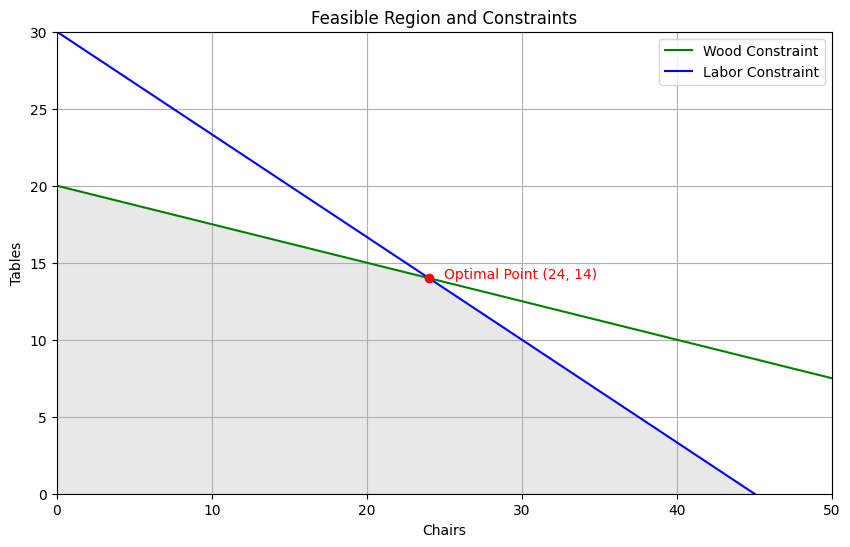

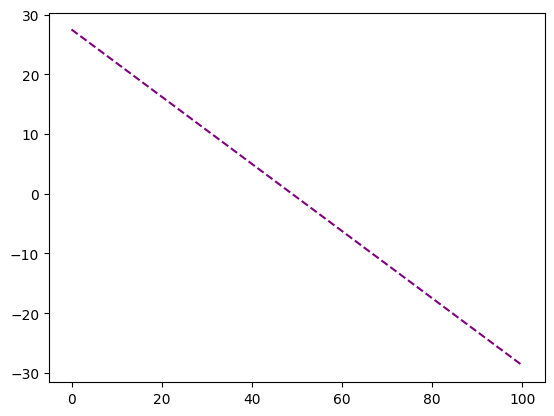

In [ ]:
# Visualization of Feasible Region and Objective

# Setup plot range
import matplotlib.pyplot as plt
import numpy as np

x_vals = np.linspace(0, 100, 400)
y1 = (400 - 5 * x_vals) / 20      # Wood constraint
y2 = (450 - 10 * x_vals) / 15     # Labor constraint

# Plot constraints
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y1, label="Wood Constraint", color='green')
plt.plot(x_vals, y2, label="Labor Constraint", color='blue')

# Fill feasible region
plt.fill_between(x_vals, np.minimum(y1, y2), where=(y1 >= 0) & (y2 >= 0), color='lightgrey', alpha=0.5)

# Mark corrected optimal point (24, 14)
plt.plot(24, 14, 'ro')  # Optimal solution point
plt.text(24 + 1, 14, 'Optimal Point (24, 14)', fontsize=10, color='red')

# Plot labels
plt.xlim((0, 50))
plt.ylim((0, 30))
plt.xlabel("Chairs")
plt.ylabel("Tables")
plt.title("Feasible Region and Constraints")
plt.legend()
plt.grid(True)
plt.show()

# Add iso-profit line (optional)
z = 2200  # Profit level
y_profit = (z - 45 * x_vals) / 80
plt.plot(x_vals, y_profit, label="Profit Line (Z=2200)", color='purple', linestyle='--')

**INSIGHTS & RECOMMENDATIONS**
* Produce 24 chairs and 14 tables weekly to achieve maximum profit of ₹2200.

* This production plan uses:

  * Wood Used: 5×24 + 20×14 = 120 + 280 = 400 units (fully utilized)

  * Labor Used: 10×24 + 15×14 = 240 + 210 = 450 hours (fully utilized)

* All available resources (wood and labor) are fully utilized, indicating a highly efficient production plan.

* Since there's no unused resource, there's no immediate bottleneck to resolve. * However:

  * If demand increases, consider expanding labor or wood supply.

  * Introducing another product could optimize profits further if resources are added or become underutilized in the future.

**EXTENSIONS / ADVANCED IDEAS**
* Add storage cost or market demand constraints.

* Use mixed-integer programming for complex decisions.

* Visualize feasible region and objective contours (for linear problems).